GitHub: TheGamerCodes

### **Introduction**: 
### **HR Analytics: Employee Promotion Data**

#### Problem Statement:
A large MNC has nine (9) broad verticals across the organization. One of the problems is identifying the right people for promotion (only for the manager position and below) and preparing them in time.
The final promotions are only announced after the evaluation, which leads to delays in the transition to new roles. Hence, the company needs help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.
Multiple attributes have been provided around Employee's past and current performance and demographics.

The Objective is to **Predict the eligible candidates for promotion**.
Source: https://www.kaggle.com/datasets/arashnic/hr-ana?select=train.csv

#### 1. Import Dependencies. 

Let's start by importing the packages we need:

In [1]:
# Data Handling:
import pandas as pd
import numpy as np

# Data Visualization:
import matplotlib.pyplot as plt
import seaborn as sns

# Data Transformation & Feature Extraction:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Machine Learning Models:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Model Evaluation & Improvement:
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score

# File Handling:
import pickle


import warnings
warnings.filterwarnings('ignore')

sns.set(font_scale = 2)

#### 2. Load Dataset. 

In [2]:
# Load Datasets:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
# Examine #. of rows & columns (shape) of datasets:
print(f'Train dataset: {train_df.shape[0]} rows & {train_df.shape[1]} columns')
print(f'Test dataset: {test_df.shape[0]} rows & {test_df.shape[1]} columns')

Train dataset: 54808 rows & 13 columns
Test dataset: 23490 rows & 12 columns


In [4]:
train_cols = train_df.columns.astype('str').to_list()
test_cols = test_df.columns.astype('str').to_list()
test_cols.append('*')
total_cols = pd.DataFrame(data={'Train_Cols': train_cols, 'Test_Cols': test_cols})
total_cols

,Train_Cols,Test_Cols
0,employee_id,employee_id
1,department,department
2,region,region
3,education,education
4,gender,gender
5,recruitment_channel,recruitment_channel
6,no_of_trainings,no_of_trainings
7,age,age
8,previous_year_rating,previous_year_rating
9,length_of_service,length_of_service


In [5]:
# Display 1st few rows of the datasets:
train_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [6]:
test_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,61


##### Data Description:
- **employee_id**: Unique ID for employee
- **department**: Department of employee
- **region**: Region of employment (unordered)
- **education**: Education Level
- **gender**: Gender of Employee
- **recruitment_channel**: Channel of recruitment for employee
- **no_ of_ trainings**: no of other trainings completed in previous year on soft skills, technical skills etc.
- **age**: Age of Employee
- **previous_ year_ rating**: Employee Rating for the previous year
- **length_ of_ service**: Length of service in years
- **awards_ won?**: if awards won during previous year then 1 else 0
- **avg_ training_ score**: Average score in current training evaluations
- **is_promoted**: **(Target)** Recommended for promotion

#### 3. Data Cleaning/Preprocessing. 

Data preprocessing is an essential step in the data science pipeline. It involves taking corrective measures/steps to ensure that the data is in the best possible condition, free of any error, anomaly or inconsistency.

A dataset can always have empty rows/cells. This problem would make it difficult to perform some aggregations/perform specific operations on the dataset. So instead, we will check for any missing values and impute the missing values appropriately. 

##### a) Check for Missing Values:

In [7]:
# Check for total missing Values in train dataset:
train_total_missing = train_df.isnull().sum()

# Data Types:
train_d_types = train_df.dtypes

# Determine Percentage of missing values:
train_missing_perc = round((train_df.isnull().sum() / train_df.shape[0])*100, 2)
train_missing = pd.concat([train_d_types, train_total_missing, train_missing_perc], axis=1, keys=['Data Type', 'Total Missing', 'Percentage (%)'])
train_missing

,Data Type,Total Missing,Percentage (%)
employee_id,int64,0,0.00
department,object,0,0.00
region,object,0,0.00
education,object,2409,4.40
gender,object,0,0.00
recruitment_channel,object,0,0.00
no_of_trainings,int64,0,0.00
age,int64,0,0.00
previous_year_rating,float64,4124,7.52
length_of_service,int64,0,0.00


In [8]:
# Check for total missing Values in test dataset:
test_total_missing = test_df.isnull().sum()

# Data Types:
test_d_types = test_df.dtypes

# Determine Percentage of missing values:
test_missing_perc = round((test_df.isnull().sum() / test_df.shape[0])*100, 2)
test_missing = pd.concat([test_d_types, test_total_missing, test_missing_perc], axis=1, keys=['Data Type', 'Total Missing', 'Percentage (%)'])
test_missing

,Data Type,Total Missing,Percentage (%)
employee_id,int64,0,0.00
department,object,0,0.00
region,object,0,0.00
education,object,1034,4.40
gender,object,0,0.00
recruitment_channel,object,0,0.00
no_of_trainings,int64,0,0.00
age,int64,0,0.00
previous_year_rating,float64,1812,7.71
length_of_service,int64,0,0.00


<AxesSubplot:xlabel='previous_year_rating'>

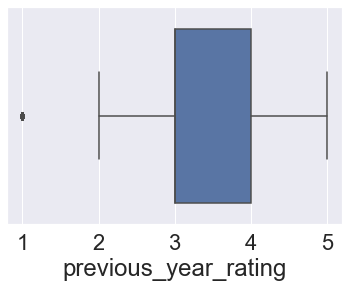

In [9]:
# Checking for Outliers in train_df.previous_year_rating:
sns.boxplot(train_df['previous_year_rating'])

<AxesSubplot:xlabel='previous_year_rating'>

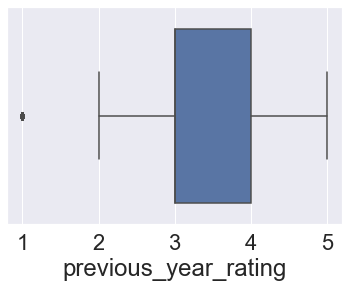

In [10]:
# Checking for Outliers in test_df.previous_year_rating:
sns.boxplot(test_df['previous_year_rating'])

From the respective tables and boxplots above:
- The `'education'` and `'previous_year_rating'` columns are missing some values. 
- The percentage of missing values for both columns is low, therefore they can be imputed using various methods.
- The `'education'` column is categorical, therefore the missing values will be imputed using the `mode` (most frequently occurring value)of the column. 
- The `'previous_year_rating'` column is Numerical and contains an outlier value, therefore the missing values will be imputed using the `median` (for robustness to outliers) of the column. 

##### b) Impute Missing Values:

In [11]:
# Determine Median train['previous_year_rating']:
rating_median = round(train_df['previous_year_rating'].median(), 1)

# Fill NULL with 'rating_median':
train_df['previous_year_rating'] = train_df['previous_year_rating'].fillna(rating_median)

In [12]:
# Determine Median test['previous_year_rating']:
rating_median = round(test_df['previous_year_rating'].median(), 1)

# Fill NULL with 'rating_mean':
test_df['previous_year_rating'] = test_df['previous_year_rating'].fillna(rating_median)

In [13]:
# Determine the Mode of train['education'] 
education_mode = train_df['education'].mode()[0]

# Fill NULL with 'education_mode':
train_df['education'] = train_df['education'].fillna(education_mode)

In [14]:
# Determine the Mode of test['education'] 
education_mode = test_df['education'].mode()[0]

# Fill NULL with 'education_mode':
test_df['education'] = test_df['education'].fillna(education_mode)

Confirm that there are no missing values.

In [15]:
# Check again for missing Values in train_df:
train_df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [16]:
# Check again for missing Values in test_df:
test_df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
dtype: int64

#### 4. Exploratory Data Analysis (EDA):
The goal of EDA is to obtain insights by examining the values within and between the various columns in the dataset.

We need to get some information about the data by producing summary information.

##### a) Basic Summary:

In [17]:
# Look at summary:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


From the above data summary, it can be observed that there are five (5) columns containing categorical data and 8 containing numerical data. 

Next, the Descriptive Statistics.

##### b) Descriptive Statistics:

In [18]:
# Descriptive Stats. Numerical Columns:
train_df.describe().style.background_gradient(cmap='YlOrRd')

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.304481,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.214770,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


From the above Descriptive statistic, it can be observed that the employees' average age is about 35, their average length of service is about 6 years, and their average previous year rating is 3.3.

In [19]:
# Descriptive Stats. Categorical Columns:
train_df.describe(include='object')

,department,region,education,gender,recruitment_channel
count,54808,54808,54808,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,39078,38496,30446


In [20]:
train_df.recruitment_channel.unique()

array(['sourcing', 'other', 'referred'], dtype=object)

The above Descriptive statistics of Categorical columns can be summarised as follows:
A majority of employees can be described as:
- Working in the company's `'Sales & Marketing'` department 
- Working in `'region_2'` 
- Having an education level of `'Bachelor's'` 
- Being `'male'` 
- Having been recruited through a channel, `'other'`.An alternative to *sourcing* & *referred*.

### Univariate Analysis:

##### c) Class Distribution:

We need to check the class distribution in the dataset. It is an essential step for the modeling stage of the project because class imbalance causes Machine Learning models to be better at generalizing the class with a higher number of samples. We do not want this kind of outcome.

<AxesSubplot:ylabel='is_promoted'>

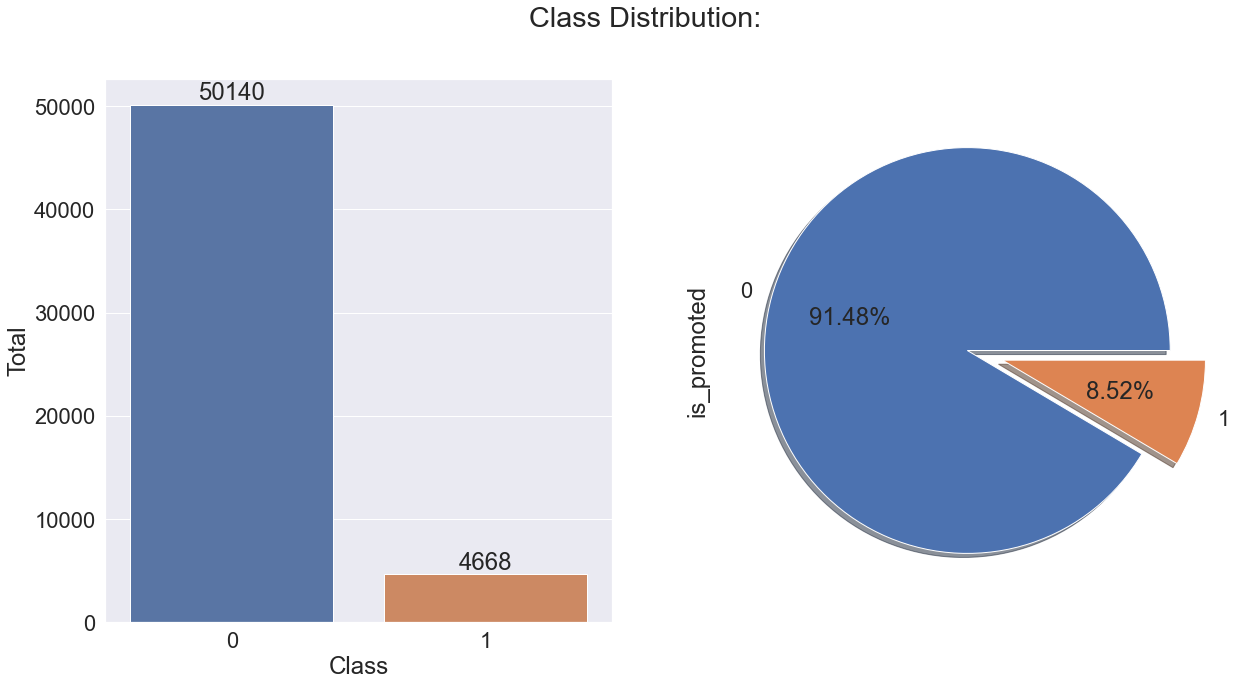

In [21]:
# Check Class Distribution:
plt.figure(figsize=(20,10))
plt.suptitle('Class Distribution:')

# Bar Plot:
plt.subplot(1,2,1)
ax = sns.countplot(train_df['is_promoted'])

# Setting bar labels
count_values = train_df['is_promoted'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=count_values)

plt.xlabel('Class')
plt.ylabel('Total')

# Pie Chart:
plt.subplot(1,2,2)
train_df['is_promoted'].value_counts().plot(kind='pie', explode = [0, 0.18], autopct='%.2f%%', shadow=True)



From the above plots, it can be observed that **`class 0`** has a **significantly higher** number of samples **than** **`class 1`**, indicating a significant class imbalance.

Next, the gender Distribution of the employees will be examined.

##### d) Gender Distribution:

Text(0, 0.5, 'Total')

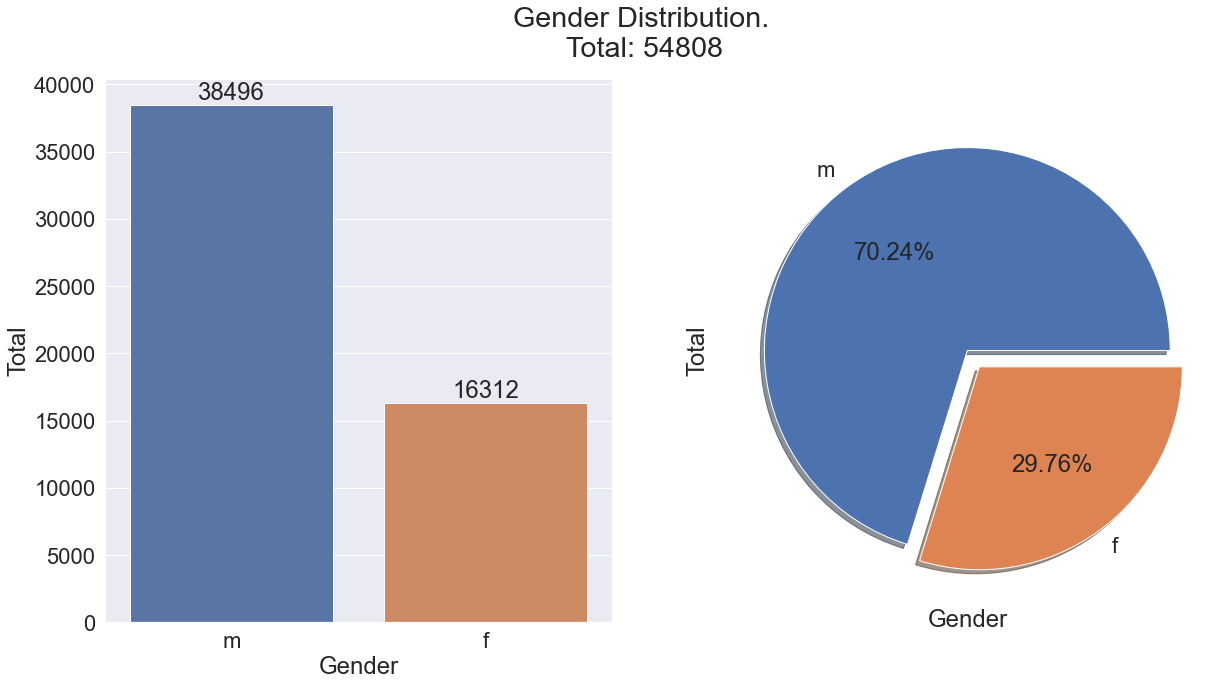

In [22]:
# Make plot of employee gender distribution:
plt.figure(figsize=(20,10))
gen_tot = len(train_df.index)
plt.suptitle(f'Gender Distribution. \nTotal: {gen_tot}')

# Bar Plot:
plt.subplot(1,2,1)
ax = sns.countplot(train_df['gender'], order=['m','f'])
gender_count = train_df['gender'].value_counts(ascending=False).values

# Setting bar labels
ax.bar_label(container=ax.containers[0], labels=gender_count)
plt.xlabel('Gender')
plt.ylabel('Total')

plt.subplot(1,2,2)
train_df['gender'].value_counts(ascending=False).plot(kind='pie', explode = [0, 0.1], autopct='%.2f%%', shadow=True)
plt.xlabel('Gender')
plt.ylabel('Total')


There is a total of 54,808 employees in the dataset. Of this, the `male` employees make up `70.24%` of the total while `female` employees make up `29.76%`.

The following histogram will be used to summarize the age distribution of the employees in the dataset.

##### e) Age Distribution:

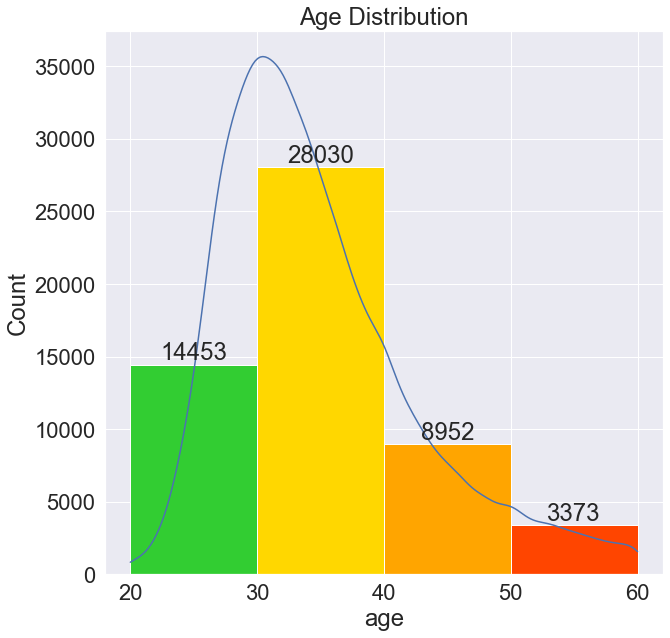

In [23]:
# Plot of employees' Age distribution:
plt.figure(figsize=(10,10))
plt.title('Age Distribution')

ax = sns.histplot(data=train_df, x='age', bins=4, kde=True)

# Setting bar labels
ax.bar_label(container=ax.containers[0])
ax.patches[0].set_facecolor('limegreen')
ax.patches[1].set_facecolor('gold')
ax.patches[2].set_facecolor('orange')
ax.patches[3].set_facecolor('orangered')
plt.show()

### Multivariate Analysis:

##### f) Age Vs. Gender Distribution:

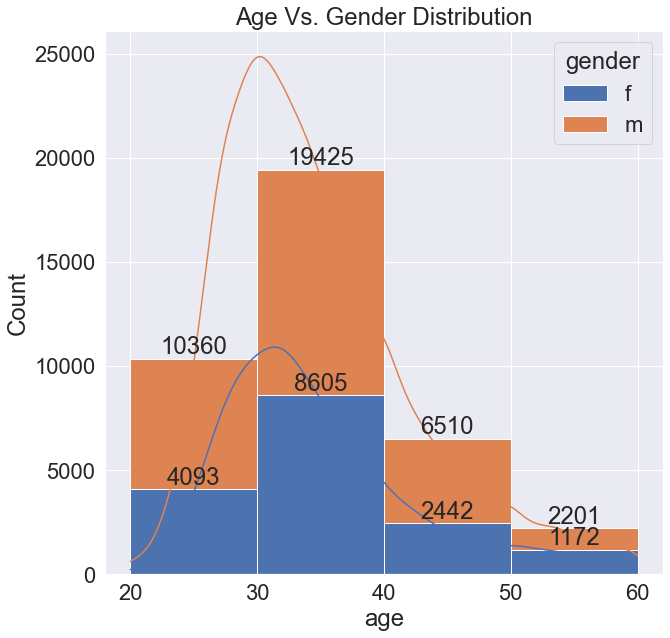

In [24]:
# Plot of employees' Age distribution:
plt.figure(figsize=(10,10))
plt.title('Age Vs. Gender Distribution')

ax = sns.histplot(data=train_df, x='age', hue='gender', alpha=1, bins=4, kde=True, legend=True)

# Setting bar labels
ax.bar_label(container=ax.containers[0])
ax.bar_label(container=ax.containers[1])
plt.show()


##### g) Previous Year Rating Vs. Promotion:

Some insights can be drawn by observing the total number of employees, their past ratings and whether they were promoted. This is summarized in the plot that follows.

Text(0, 0.5, 'Total')

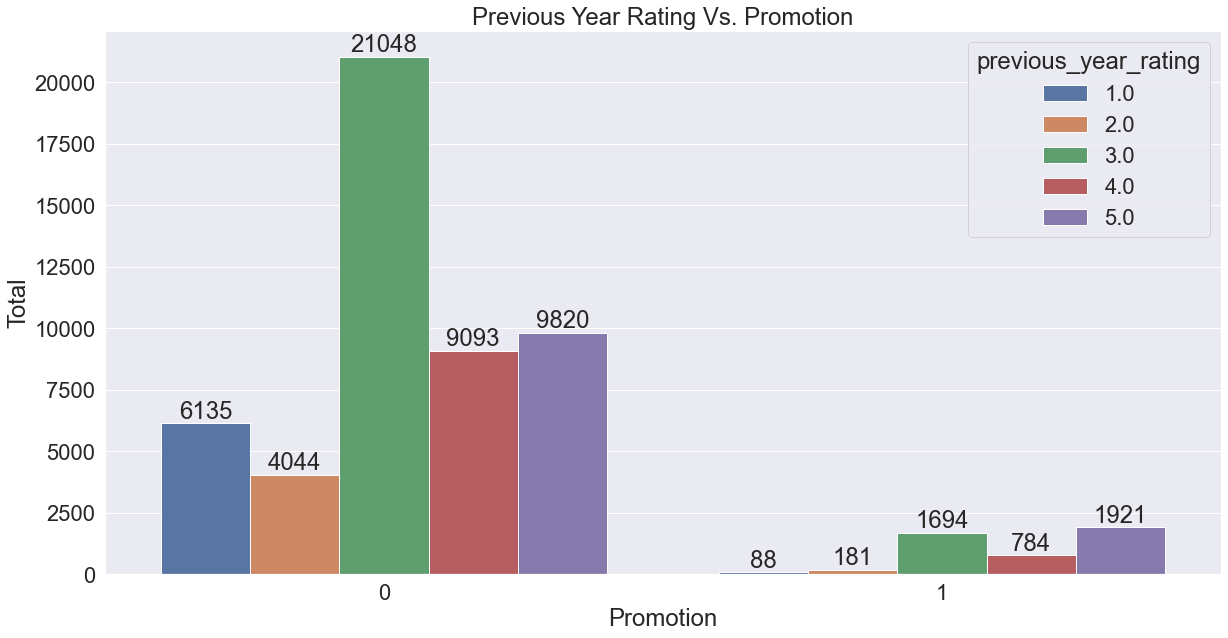

In [25]:
plt.figure(figsize=(20,10))
plt.title('Previous Year Rating Vs. Promotion')
ax = sns.countplot(train_df['is_promoted'], hue=train_df['previous_year_rating'])

# Setting bar labels
promo_count = train_df['is_promoted'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0])
ax.bar_label(container=ax.containers[1])
ax.bar_label(container=ax.containers[2])
ax.bar_label(container=ax.containers[3])
ax.bar_label(container=ax.containers[4])


plt.xlabel('Promotion')
plt.ylabel('Total')



##### h) Length of Service Vs. Promotion:

Text(0, 0.5, 'Total')

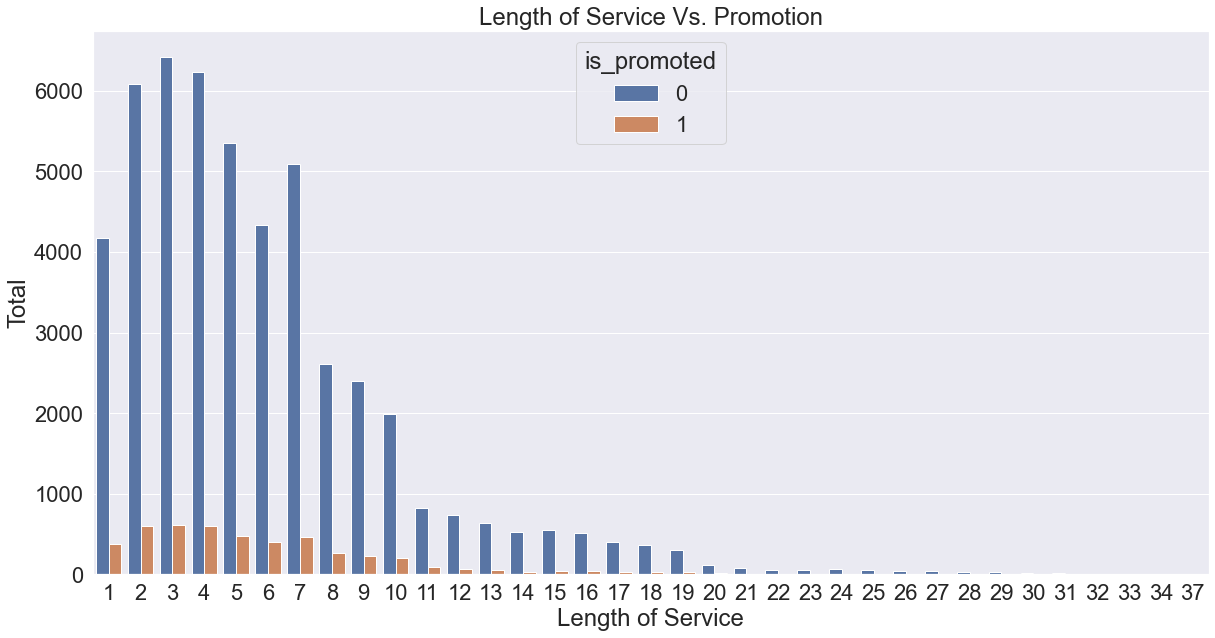

In [26]:
plt.figure(figsize=(20,10))
plt.title('Length of Service Vs. Promotion')
ax = sns.countplot(train_df['length_of_service'], hue=train_df['is_promoted'])

plt.xlabel('Length of Service')
plt.ylabel('Total')


The above plot indicates that a majority of employees that got promoted had served at the company for 2 to 4 years.

##### i) Number of Trainings Vs. Promotion:
This plot will give a summary of the total numver of employees, the number of trainings they took and their promotion status. 

Text(0, 0.5, 'Total')

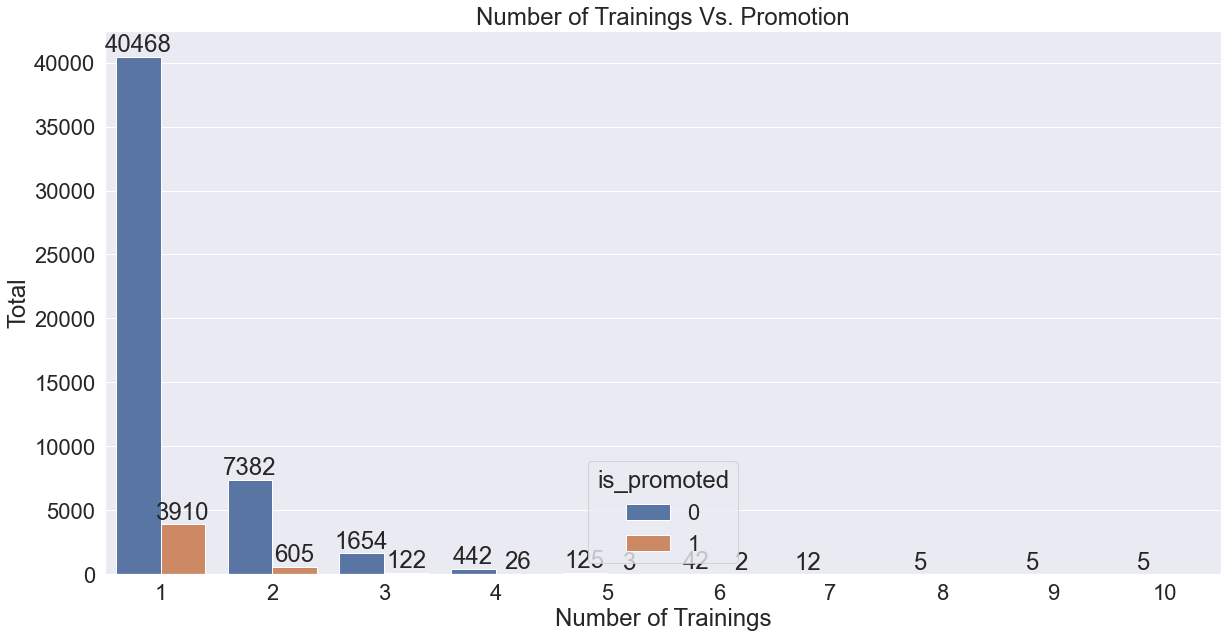

In [27]:
plt.figure(figsize=(20,10))
plt.title('Number of Trainings Vs. Promotion')
ax = sns.countplot(train_df['no_of_trainings'], hue=train_df['is_promoted'])
promo_count = train_df['is_promoted'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0])
ax.bar_label(container=ax.containers[1])

plt.xlabel('Number of Trainings')
plt.ylabel('Total')

#### 5. Feature Engineering:

##### a) Define Features & Labels:

In [28]:
# Define Features & Labels for train_df:
X = train_df.drop(["employee_id","is_promoted"], axis=1) 
y = train_df["is_promoted"]

In [29]:
# Define Features for test_df:
X1 = test_df.drop(["employee_id"], axis=1) 

##### b) Feature Selection:

The purpose of feature selection is to determine the variables that are best suited for training machine learning models. 
Machine learning models take in numeric values as input, therefore the first step will be to convert all categorical values into numeric values using the `'Ordinal Encoder'`. Thereafter, ***p-values*** will be used to determine the best set of features to be used in the modeling stage.

In [30]:
# Initialize Ordinal Encoder:
encoder = OrdinalEncoder()

In [31]:
# Transform the Data in train_df:
X[['department','region','education', 'gender','recruitment_channel']] = encoder.fit_transform(X[['department','region','education', 'gender','recruitment_channel']])

In [32]:
# Transform the Data in test_df:
X1[['department','region','education', 'gender','recruitment_channel']] = encoder.transform(X1[['department','region','education', 'gender','recruitment_channel']])

In [33]:
# Extract p-values to determine the best features for modeling:
chi_scores = chi2(X, y)
chi_scores

(array([1.17185904e-03, 2.13326122e+01, 6.63563252e+01, 2.01311313e+00,
        3.01599472e-01, 1.00634908e+01, 2.72281031e+01, 5.74656810e+02,
        1.93510843e+01, 2.05400931e+03, 5.07297374e+03]),
 array([9.72691809e-001, 3.86106847e-006, 3.76349265e-016, 1.55945032e-001,
        5.82881429e-001, 1.51236397e-003, 1.80811304e-007, 5.44932210e-127,
        1.08757475e-005, 0.00000000e+000, 0.00000000e+000]))

In [34]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values

department               9.726918e-01
recruitment_channel      5.828814e-01
gender                   1.559450e-01
no_of_trainings          1.512364e-03
length_of_service        1.087575e-05
region                   3.861068e-06
age                      1.808113e-07
education                3.763493e-16
previous_year_rating    5.449322e-127
awards_won?              0.000000e+00
avg_training_score       0.000000e+00
dtype: float64

<AxesSubplot:>

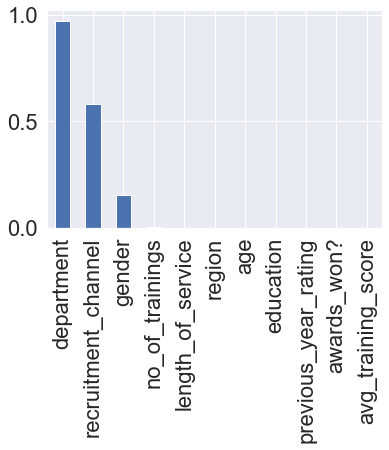

In [35]:
p_values.plot.bar()

The columns with the higher p-values indicate varying levels of independence from the target variable, therefore they are not fit for modeling.

In [36]:
# Drop Columns with highest p-values in train_df:
X = X.drop(['department', 'recruitment_channel', 'gender'], axis=1)

In [37]:
# Drop Columns with highest p-values in test_df:
X1 = X1.drop(['department', 'recruitment_channel', 'gender'], axis=1)

In [38]:
# View Features in train_df:
X.head()

,region,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,31.0,2.0,1,35,5.0,8,0,49
1,14.0,0.0,1,30,5.0,4,0,60
2,10.0,0.0,1,34,3.0,7,0,50
3,15.0,0.0,2,39,1.0,10,0,50
4,18.0,0.0,1,45,3.0,2,0,73


In [39]:
# View Features in test_df:
X1.head()

,region,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,18.0,0.0,1,24,3.0,1,0,77
1,28.0,0.0,1,31,3.0,5,0,51
2,4.0,0.0,1,31,1.0,4,0,47
3,11.0,0.0,3,31,2.0,9,0,65
4,21.0,0.0,1,30,4.0,7,0,61


In [40]:
# Feature Scaling in train_df:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 1.77652645,  1.61975831, -0.41527615, ...,  0.50045956,
        -0.15401776, -1.07593145],
       [-0.16303375, -0.62883817, -0.41527615, ..., -0.43739464,
        -0.15401776, -0.25328242],
       [-0.61940086, -0.62883817, -0.41527615, ...,  0.26599601,
        -0.15401776, -1.00114517],
       ...,
       [-1.76031862, -0.62883817, -0.41527615, ..., -0.67185819,
        -0.15401776,  1.1676568 ],
       [ 2.00471   , -0.62883817, -0.41527615, ..., -0.90632174,
        -0.15401776, -1.37507655],
       [-0.16303375, -0.62883817, -0.41527615, ..., -0.20293109,
        -0.15401776, -1.07593145]])

In [41]:
# Feature Scaling in test_df:
X1 = scaler.transform(X1)
X1

array([[ 0.29333336, -0.62883817, -0.41527615, ..., -1.14078529,
        -0.15401776,  1.01808425],
       [ 1.43425112, -0.62883817, -0.41527615, ..., -0.20293109,
        -0.15401776, -0.9263589 ],
       [-1.30395152, -0.62883817, -0.41527615, ..., -0.43739464,
        -0.15401776, -1.225504  ],
       ...,
       [-0.96167619, -0.62883817, -0.41527615, ..., -0.43739464,
        -0.15401776, -1.00114517],
       [ 0.97788401, -0.62883817,  2.86740293, ..., -1.14078529,
        -0.15401776,  0.49458032],
       [-0.84758441,  1.61975831,  2.86740293, ..., -0.20293109,
        -0.15401776,  1.91551954]])

##### c) Splitting the dataset using Train_Test_Split:
We will split our features(`X`) and labels(`y`) into a **training set (80%)** & **testing set (20%)**. We do this to prevent overfitting our models to the data.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=45)

##### d) Balance the dataset:
As observed previously, the distribution of samples(rows) per label (0, 1) is uneven. The dataset is imbalanced. Suppose we train our classification models on the data as it is. In that case, the result will be that the models will be better at generalizing/classifying instances of the majority class because of their higher number of samples. We need to prevent this outcome. Therefore, the solution is to resample our data. Oversampling will increase the number of samples in the minority class, and Undersampling will reduce the number of samples in the majority class. The goal is to balance the number of samples in each class. For this, we will use a combination of Random Oversampling for oversampling and Random Undersampling, thus utilizing the strengths of both techniques.

In [43]:
# RandomOversampling + Random Undersampling:
# First, create a pipeline.
oversamp = RandomOverSampler(random_state=45)
undersamp = RandomUnderSampler(random_state=45)
steps = [('o', oversamp), ('u', undersamp)]
pipeline = Pipeline(steps=steps)

# Then, resample the dataset using the pipeline.
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

y_resampled.value_counts()

0    40112
1    40112
Name: is_promoted, dtype: int64

Looking at the new class distribution, we can see that it is even. The next step is the modeling, where classification models will be trained on the freshly resampled data. 

#### 6. Modeling:
The selection of models for training will be both Parametric - Logistic Regression, Support Vector Classifier(SVC) and Non-Parametric, tree-based models - Decision Tree, Random Forest(ensemble). Afterward, these respective models will be evaluated, and the best-performing model will be selected for the prediction task.

##### a) Initialize and Train Models:

In [44]:
# Logistic Regression:
lr_model = LogisticRegression()
lr_model.fit(X_resampled, y_resampled)

LogisticRegression()

In [45]:
# Support Vector Classifier:
sv_model = SVC()
sv_model.fit(X_resampled, y_resampled) 

SVC()

In [46]:
# Decision Tree Classifier:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_resampled, y_resampled) 

DecisionTreeClassifier()

In [47]:
# Random Forest Classifier:
rf_model = RandomForestClassifier()
rf_model.fit(X_resampled, y_resampled)

RandomForestClassifier()

The models have been trained. The next step is to perform the classification tasks. Then, using the models, we will be `"making predictions"` using the test dataset.

##### b) Perform Classification/make Predictions on the train dataset:

In [48]:
# Logistic Regression Classification:
lr_ypred = lr_model.predict(X_test)

In [49]:
# SVC Classification:
svc_ypred = sv_model.predict(X_test)

In [50]:
# Decision Tree Classification:
dt_ypred = dt_model.predict(X_test) 

In [51]:
# Random Forest Classification:
rf_ypred = rf_model.predict(X_test) 

#### 7. Model Evaluation:
The next step will be to evaluate the performance of the models. Having addressed the class imbalance, The classification report will be useful for providing comprehensive details about the performance of each model.

##### a) Classification Report:

In [52]:
# Logistic Regression Evaluation:
print(classification_report(y_test, lr_ypred))

              precision    recall  f1-score   support

           0       0.95      0.68      0.80     10028
           1       0.16      0.65      0.26       934

    accuracy                           0.68     10962
   macro avg       0.56      0.67      0.53     10962
weighted avg       0.89      0.68      0.75     10962



In [53]:
# Logistic Regression F1-Score + Accuracy Score:
lr_f_score = f1_score(y_test, lr_ypred)
lr_acc_score = accuracy_score(y_test, lr_ypred)
print(f"Logistic Regression F1-Score is: {lr_f_score}")
print(f"Logistic Regression Accuracy Score is: {lr_acc_score}")

Logistic Regression F1-Score is: 0.25722789115646255
Logistic Regression Accuracy Score is: 0.6812625433315088


In [54]:
# SVC Evaluation:
print(classification_report( y_test, svc_ypred))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84     10028
           1       0.18      0.60      0.28       934

    accuracy                           0.74     10962
   macro avg       0.57      0.68      0.56     10962
weighted avg       0.89      0.74      0.79     10962



In [55]:
# SVC F1-Score + Accuracy Score:
svc_f_score = f1_score(y_test, svc_ypred)
svc_acc_score = accuracy_score(y_test, svc_ypred)
print(f"SVC F1-Score is: {svc_f_score}")
print(f"SVC Accuracy Score is: {svc_acc_score}")

SVC F1-Score is: 0.281661600810537
SVC Accuracy Score is: 0.7412880861156723


In [56]:
# Decision Tree Evaluation:
print(classification_report(y_test, dt_ypred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92     10028
           1       0.21      0.23      0.22       934

    accuracy                           0.86     10962
   macro avg       0.57      0.58      0.57     10962
weighted avg       0.87      0.86      0.86     10962



In [57]:
# Decision Tree F1-Score + Accuracy Score:
dt_f_score = f1_score(y_test, dt_ypred)
dt_acc_score = accuracy_score(y_test, dt_ypred)
print(f"Decision Tree F1-Score is: {dt_f_score}")
print(f"Decision Tree Accuracy Score is: {dt_acc_score}")

Decision Tree F1-Score is: 0.22404092071611253
Decision Tree Accuracy Score is: 0.861612844371465


In [58]:
# Random Forest Evaluation:
print(classification_report(y_test, rf_ypred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     10028
           1       0.36      0.21      0.26       934

    accuracy                           0.90     10962
   macro avg       0.64      0.59      0.61     10962
weighted avg       0.88      0.90      0.89     10962



In [59]:
# Random Forest F1-Score + Accuracy Score:
rf_f_score = f1_score(y_test, rf_ypred)
rf_acc_score = accuracy_score(y_test, rf_ypred)
print(f"Random Forest F1-Score is: {rf_f_score}")
print(f"Random Forest Accuracy Score is: {rf_acc_score}")

Random Forest F1-Score is: 0.2646860229574612
Random Forest Accuracy Score is: 0.9006568144499179


From the above classification reports, it can be concluded that the **`Random Forest Classifier`**, has achieved the highest accuracy score of **`0.9 (90%)`**. 

This model will be saved as a file for ease of retrieval and without the need to retrain it.

##### b) Save Trained Random Forest Model as file:

In [60]:
# Saving model as a .pkl file:
pickle.dump(rf_model, open('RandomForest_model.pkl', 'wb'))

#### 8. Classification on Test Dataset:
The objective of this project has been to **Predict the eligible candidates for promotion**. Having identified the best-performing model (Random Forest Classifier), has been saved, the objective can be achieved.

The trained Random Forest Classifier model will be used on the test dataset. It is essential that this model is given identical inputs as those used to train it. Because of this requirement, it was considered efficient to preprocess both datasets concurrently. 

#### a) Classification/Predictions on the test dataset:
For demostration purposes, the saved model will be retrieved for this task.

In [61]:
# Retrieve Saved Model:
saved_model = pickle.load(open('RandomForest_model.pkl', 'rb'))

In [62]:
# Make Predictions with loaded model:
y_hat = saved_model.predict(X1)

In [63]:
# Display first 10 predictions:
y_hat[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

##### b) Create a DataFrame to store predictions and save it as a `.csv` file:

In [64]:
# Create Dataframe of the test dataset predictions:
predictions = pd.DataFrame()
predictions.index = np.arange(len(y_hat))
predictions['employee_id'] = test_df.employee_id
predictions['promoted_?'] = y_hat
# predictions.set_index('employee_id', inplace=True)

In [65]:
predictions.head()

,employee_id,promoted_?
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [66]:
predictions.to_csv("employee_preds.csv")

### Conclusion

The objective of this project was to **Predict the eligible candidates for promotion**. 
The dataset had anolamies such as missing values/empty rows and a significant class imbalance. Therefore, corrective measures were used, namely data imputation for the missing values and resampling techniques(oversampling & undersampling) before the modeling phase.
The train dataset was then used to train 4 ML classification models:
 + Logistic Regression 
 + Support Vector Classifier
 + Decision Tree, and 
 + Random Forest Classifier. 

The latter, `Random Forest Classifier`, was the best performing model having an `accuracy` score of 0.90, `(90%)`. 

The Random Forest Classifier is an ensemble method. This means that utilizes a large number of decision trees, whereby each individual tree's classification output counts as a vote. The class that has the highest number of votes becomes the model's final prediction. When building each individual tree, the Random Forest Classifier employs bagging and feature randomness in order to build an uncorrelated forest of trees whose collective prediction (committee) is more accurate than that of any individual tree.

In conclusion, it is important for HR (Human Resource) professionals and senior management staff to be able to choose eligible candidates for promotion within their organisations. This application of Machine Learning would further enhance this process by taking a data-driven approach to decision-making.

There is room for further improvement in modeling, through techniques such as hyperparameter tuning to enhance model performance. Model deployment can also be achieved through integration with an application with a Graphical User Interface (GUI) for ease of access and use by industry professionals.